# Creating Label Images 

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

Creating Pixel-Scale Label Images (a.k.a "Ground truth")

* All/any ML or DL image classification requires you to have a set of labeled images for training, AND a set of labeled images for testing
* Often, creating such ground truth data can be time-consuming

This notebook demonstrates how to create a ground truth (label) image using a weakly supervised conditional random field

* This is something we can't do in the notebook because it involves interacting with graphics. So, you'll be running this on your laptop 

![](figs/dl_tools_label.png)

## label_1image_crf.py

The script is part of the ```dl_tools``` package. 

You will run this script on your own PC, from an anaconda prompt

### Syntax

```python create_groundtruth\label_1image_crf.py -w 500 -s 0.125```

* -w : window size in pixels. The program is designed to work on portions of the image. This flag sets the size of the chunk of each image you will work with

* -s : downscaling factor. Use this flag to resize the image (for the CRF part of the algorithm, to save time)

### Workflow

1. conda activate dl_tools (or whatever you called your conda environment)
2. navigate to dl_tools 
3. cd create_groundtruth
3. ```python label_1image_crf.py -w 500 -s 0.125```
4. You will first be prompted to select an image to work on
5. Next, you will be promted to select a labels file
6. Finally, you will be prompted to select a colors file

On each chunk, cycling through a pre-defined set of classes, you will be prompted to draw (using the cursor) example regions of the image that correspond to each label. 

These annotations should be exemplative, i.e., a relatively small portion of the region in the chunk that pertains to the class, rather than delimiting the entire region within the chunk that pertains to the class. 

Typically, the CRF algorithm only requires a few example annotations for each class. 

For very heterogeneous scenes, however, where each class occurs in several regions across the image, example annotations should be provided for each class in each region where that class occurs.

### Demo

We'll select an image from the [Google Drive](https://drive.google.com/open?id=1IhStVBhWMKLZUWIprti6zZyOg32-W4Of)

* The images are located in semseg_data/Monterey_scarps/test. We'll use [this one](https://drive.google.com/open?id=1ZVYXp4h6dtduhCyliNVFrgbW9jkSENer)

* The labels are located in semseg_data/Monterey_scarps/labels. We'll use [this one](https://drive.google.com/open?id=1XYkpKZmu1jZsQX72b_FlxKyvMyOxqn5O)

* The label colors are located in semseg_data/Monterey_scarps/labels. We'll use [this one](https://drive.google.com/open?id=1pKCLUSdeW1EDQMYUcpEOdheDAdYlRogl)

1. Download each of these three files

![](figs/downloads.png)

You should notice that there is one color in label_colors.txt per class in labels.txt. The colors can be matplotlib color strings (for example, r, g, b, m, k, y, c) or html color codes

* Open anaconda prompt, navigate (```cd```) to ```dl_tools``` directory

* Activate ```dl_tools``` conda environment

The syntax I will use is below

```python create_groundtruth/label_1image_crf.py -w 500 -s 0.2```

which says I will be using a 500x500 pixel window of the image at any one time, and the image will be rescaled to 20% of its original size to do the CRF processing (for speed)

![](figs/label_image.png)

First, it prompts you to select an image you wish to create a label image for

(currently, JPG, jpg, jpeg, png, PNG, tif, tiff, TIF and TIFF extensions supported)

![](figs/pick_image.png)

Second, it prompts you to select a labels file (a text file containing classes)

![](figs/pick_labels.png)

And the same for the label colors file (text file containing a color per row in labels file)

Then it displays the whole image:

![](figs/image.png)

and a portion of the image (a 500 x 500 pixel window because our ```w``` parameter was 500). Notice that the title of the small window indicates which class it expects example annotations for (in the case below, "agricultural" land)

![](figs/tile.png)

It is the smaller window that you annotate with the cursor. The larger image is just to show you where you are in the image. You'll notice the command window gives you further instruction for how to change the size of the brush. It also tells you that when you are finished with a class/window, hit the ```Esc``` key to progress to the next class/window

![](figs/cmd_label.png)

Annotate each class present in each tile. This should be exemplative, not exhaustive.

Active annotations are red. Previous annotations (from other classes) are black.

Hitting the 'Z' key on your keyboard will remove your last annotation

![](figs/active_anno.png)

When you are finished annotating, the windows will disappear and the terminal will look like this

The program is using an algorithm to estimate the class of each pixel, based on the spare annotations you provided

CRF inference time depends primarily on image complexity and size, but is also secondarily affected by the number and spatial heterogeneity of the class labels.

![](figs/generating.png)

After a couple of minutes, the labeling is complete. In the same folder as the image (and labels), you should see 4 new files

![](figs/outputs.png)

* a file ending in "mres.png" that shows the input image, your annotations, and the final estimated label image

![](figs/D800_20160308_221757-0_mres.png)

* A ".mat" file containing the results. Note, this is NOT a Microsoft access database. It is matlab format. However, you won't need matlab to read this file. I will show you how to read this file in python later

* a ".txt" file that contains a report detailing the relative proportions of each class in the image, and how long it took you to annotate the image

* another ".png" file that shows a greyscale 8-bit label image

#### Notes

* This process works best with smallish images (typically less than 10000 x 10000 pixels), so you may have to crop/tile larger imagery
* Try to annotate a few examples of each class in each part of the image where they occur. Don't annotate in just one region of the image. This is because the CRF algorithm uses spatial information in its predictions
* There are no rules as to how much annotation is required. It depends on the image. Try a few different levels of annotation, from really sparse to really dense, and evaluate how much annotation is necessary

## Examine outputs

A .mat file is created that contains the results. It is a binary format (the same as matlab) 

In [16]:
from scipy.io import loadmat
dat = loadmat('D800_20160308_221735-0_mres.mat')
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'sparse', 'class', 'preds', 'labels'])

What are these variables?

1. ```sparse```
    * the DCNN-derived unary potentials
2. ```class```
    * the pixelwise label
3. ```labels```
    * the class names

Let's take a quick look

In [17]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

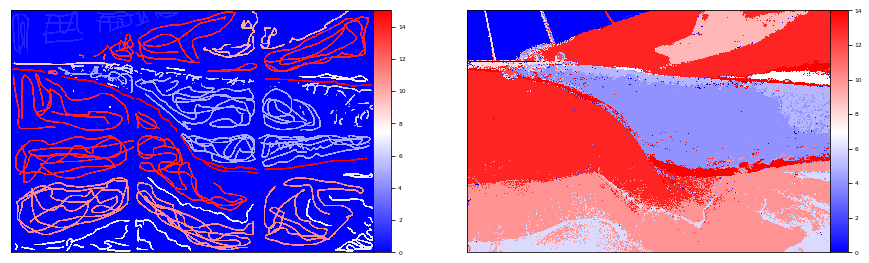

In [18]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
im2 = ax1.imshow(dat['sparse'], cmap='bwr')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%")
cb=plt.colorbar(im2, cax=cax)
cb.ax.tick_params(labelsize=6)

ax1 = fig.add_subplot(122)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
im2 = ax1.imshow(dat['class'], cmap='bwr')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%")
cb=plt.colorbar(im2, cax=cax)
cb.ax.tick_params(labelsize=6)  

## How does this work?

Image pixels and associated labels are mapped to a computational graph

![](figs/Picture11.png)

The joint probability of the image features given the labels is modelled as the product of two functions (called potentials) that are minimized using optimization techniques

![](figs/Picture12.png)

Our annotations are one potential - the computational cost of assigning a given label to a given node

![](figs/Picture13.png)

The other (pairwise) potentials are the cost of simultaneously assigning label yi to node i and label yj to node j

![](figs/Picture14.png)

And this is all solved simultaneously using an iterative algorithm

## Exercise

Have a go yourself, on a dataset of your own choosing

## Attention GeoTIFF users!

There is a special version of this annotation program for geoTIFF format

There are other python libraries you'll need to use it:

```conda install rasterio gdal```

The program is called like this:
    
```python create_groundtruth\label_1geotiff_crf.py -w 500 -s 1.0``` 

and works the same as the program for photographic imagery. The resulting label image is in the same projection as the input image

An example image and resulting label is provided:

![](figs/elwha.png)
![](figs/elwha_class.png)